## IMPORTING LIBRARIES

In [1]:
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
!pip install folium

In [3]:
import folium as fo 
world_map=fo.Map()
world_map

## DATA INSPECTION

In [4]:
DATA_PATH = Path("data")

In [5]:
#reading the data 
data = pd.read_csv(DATA_PATH/"housing.csv")

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Number of Records
print(f"Number of rows in the dataset:{data.shape[0]}")
print(f"Number of columns in the dataset:{data.shape[1]}")

Number of rows in the dataset:20640
Number of columns in the dataset:10


In [8]:
#data statistics 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## DATA CLEANING

In [11]:
#checking for missing values 
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
#Convert the different types of missing values into np.nan
data.replace('na', np.nan, inplace = True)
data.replace('null', np.nan, inplace = True)
data.replace('NA', np.nan, inplace = True)
data.replace('NULL', np.nan, inplace = True)
data.replace('Null', np.nan, inplace = True)
data.replace('NaN', np.nan, inplace = True)

In [13]:
#Dropping all the rows that have np.nan (missing value)
new_df = data.dropna(axis = 'index', how = 'any')
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### CHECKING HOW THE DATA IS BEING DISTRIBUTED USING A HISTOGRAM

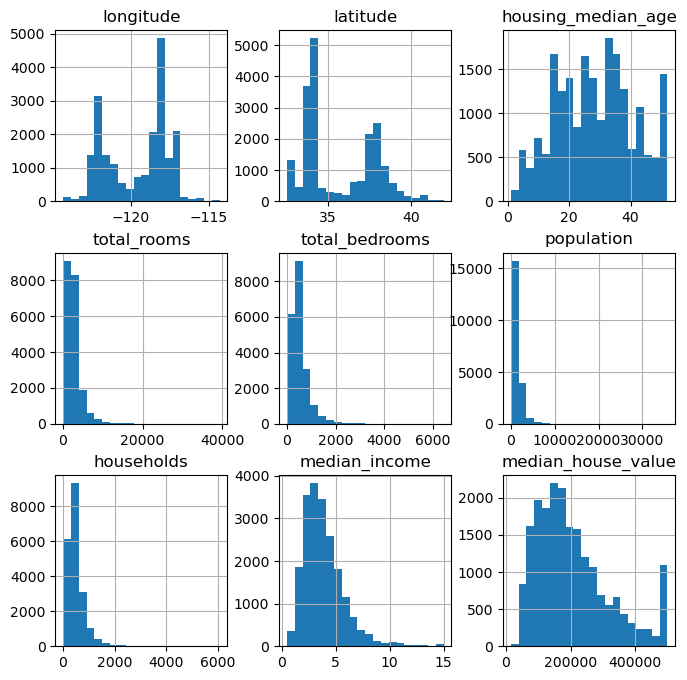

In [14]:
new_df.hist(figsize=(8,8), bins=20);

For longitude:
Lower bound: -127.48499999999999, Upper bound: -112.32500000000002



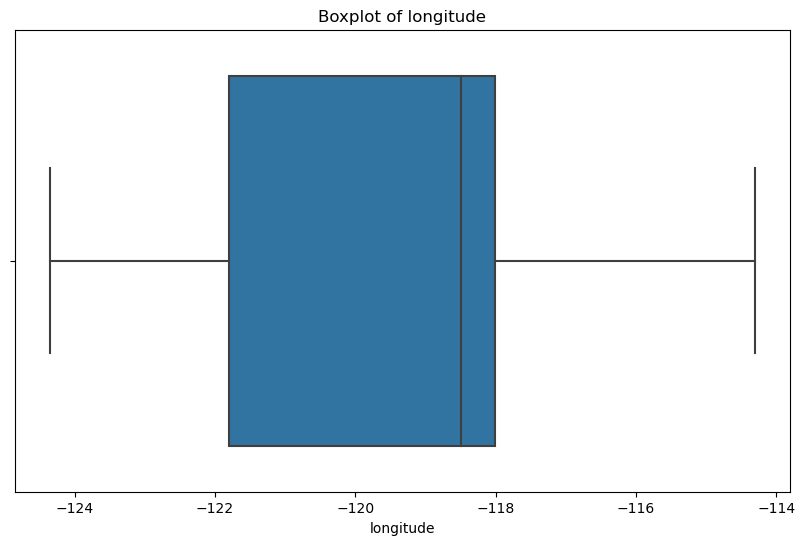

For latitude:
Lower bound: 28.245, Upper bound: 43.405



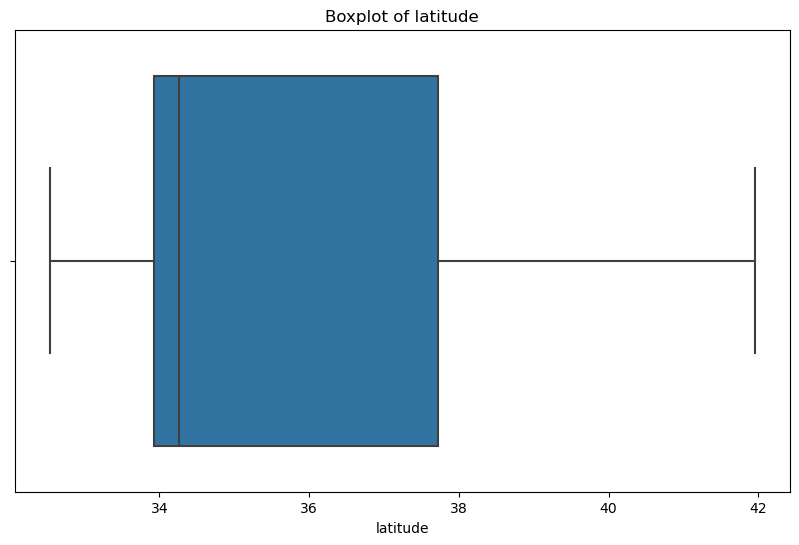

For housing_median_age:
Lower bound: -10.5, Upper bound: 65.5



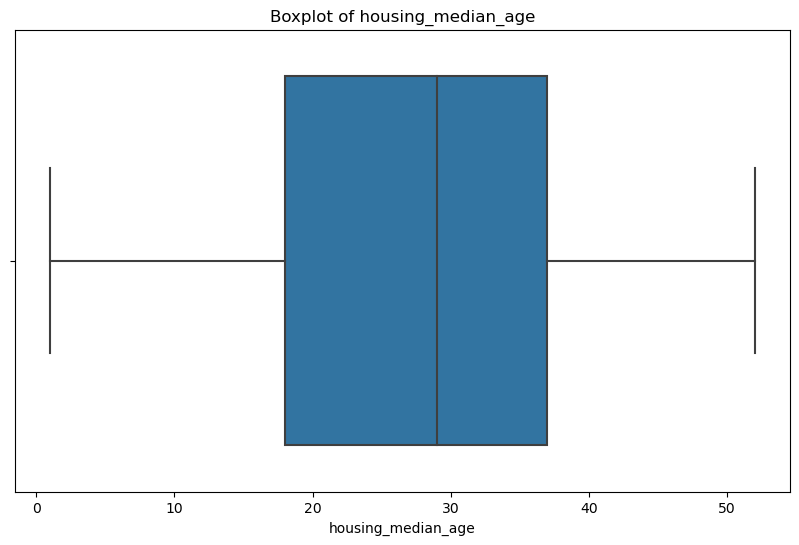

For total_rooms:
Lower bound: -1089.5, Upper bound: 5682.5



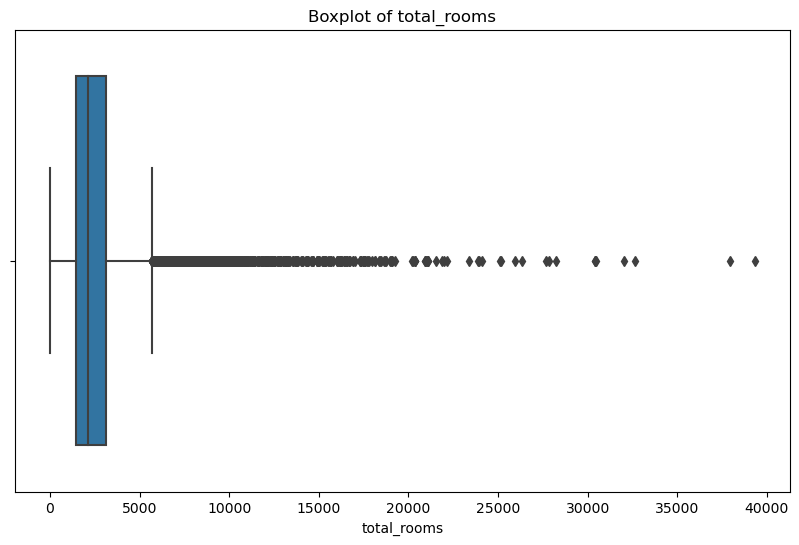

For total_bedrooms:
Lower bound: -230.5, Upper bound: 1173.5



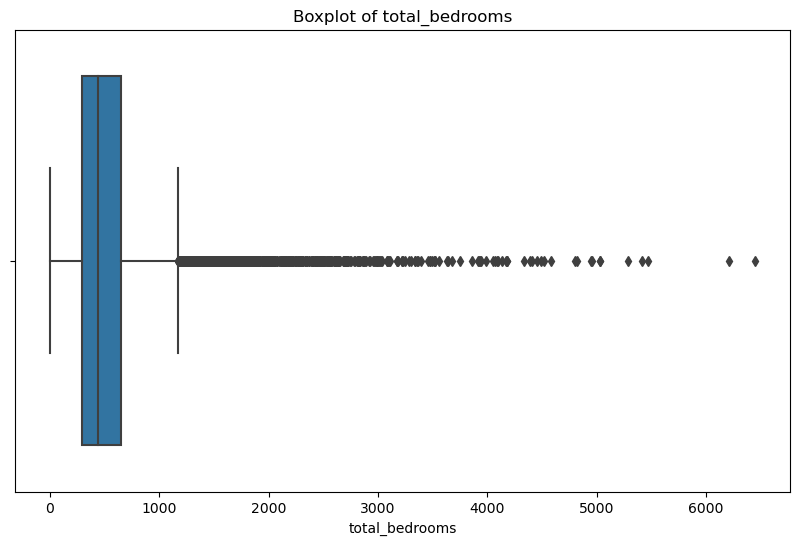

For population:
Lower bound: -615.5, Upper bound: 3124.5



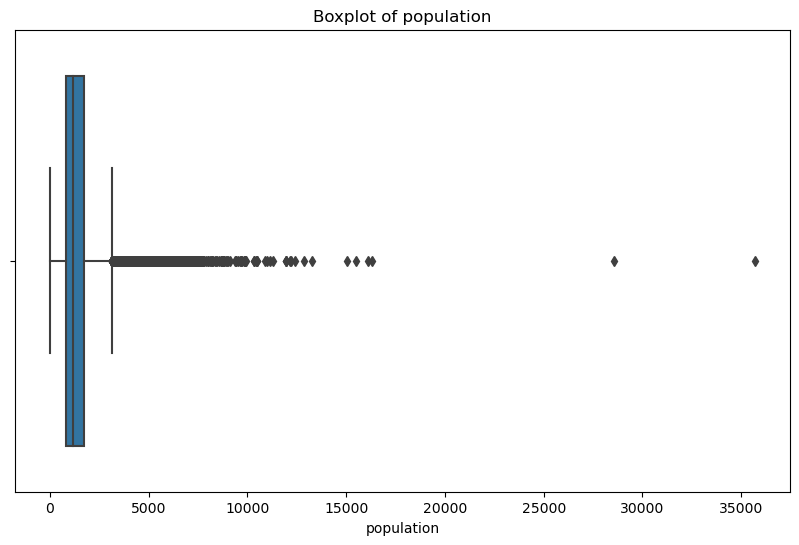

For households:
Lower bound: -206.0, Upper bound: 1090.0



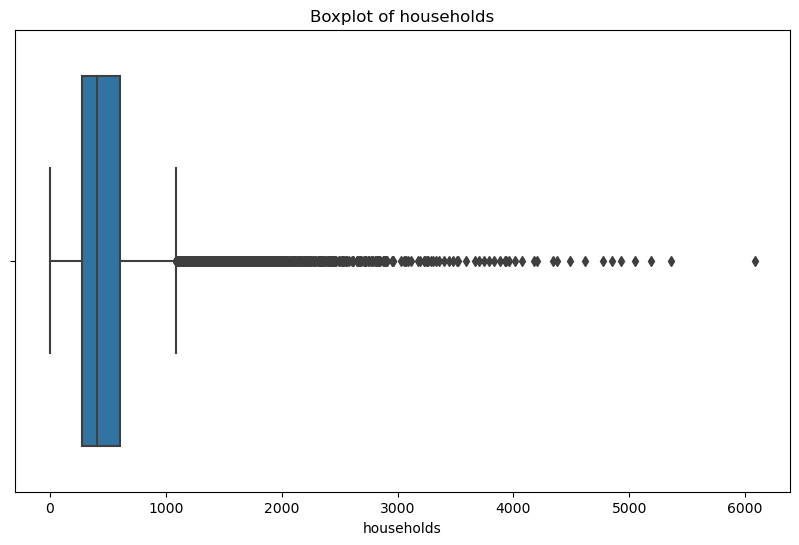

For median_income:
Lower bound: -0.70675, Upper bound: 8.01445



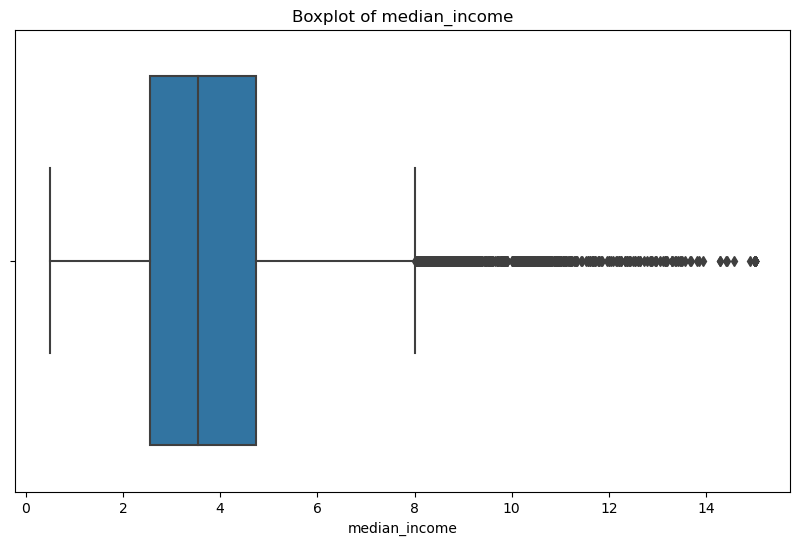

For median_house_value:
Lower bound: -98300.0, Upper bound: 482500.0



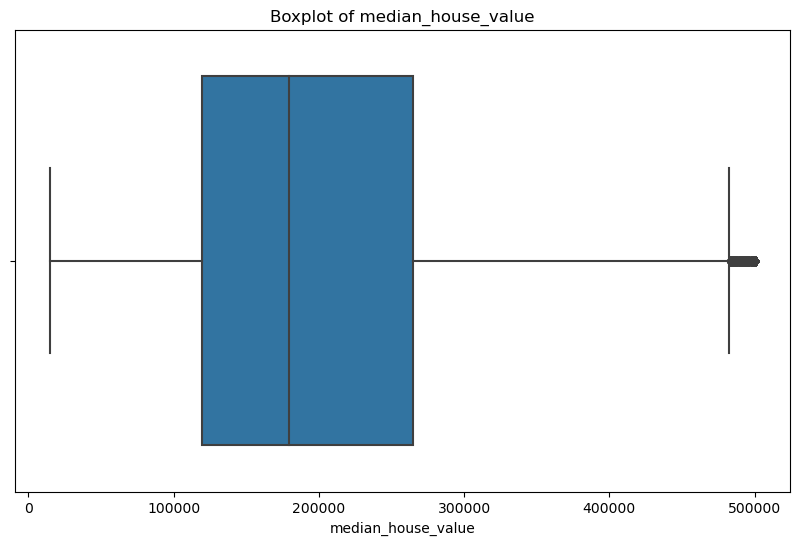


Outliers using IQR:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
101      -122.25     37.81                28.0       5806.0          1603.0   
104      -122.26     37.81                34.0       5871.0          1914.0   
185      -122.23     37.79                43.0       5963.0          1344.0   
283      -122.16     37.79                22.0      12842.0          2048.0   
...          ...       ...                 ...          ...             ...   
20322    -119.14     34.23                 8.0        243.0            75.0   
20325    -119.04     34.28                21.0       1856.0           276.0   
20326    -118.96     34.30                16.0       3103.0           482.0   
20422    -118.90     34.14                35.0       1503.0           263.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

outliers_iqr = pd.DataFrame()

for col in columns:
    # IQR Method:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_i = new_df[((new_df[col] < (Q1 - 1.5 * IQR)) | (new_df[col] > (Q3 + 1.5 * IQR)))]
    
    # Appending to the outliers dataframe
    outliers_iqr = pd.concat([outliers_iqr, outliers_i])
    
    # Print the outlier range for IQR
    print(f"For {col}:")
    print(f"Lower bound: {Q1 - 1.5 * IQR}, Upper bound: {Q3 + 1.5 * IQR}\n")
    
    # Plotting boxplot for IQR
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Removing duplicate rows in case a row is an outlier for multiple columns
outliers_iqr = outliers_iqr.drop_duplicates()

print("\nOutliers using IQR:\n", outliers_iqr)


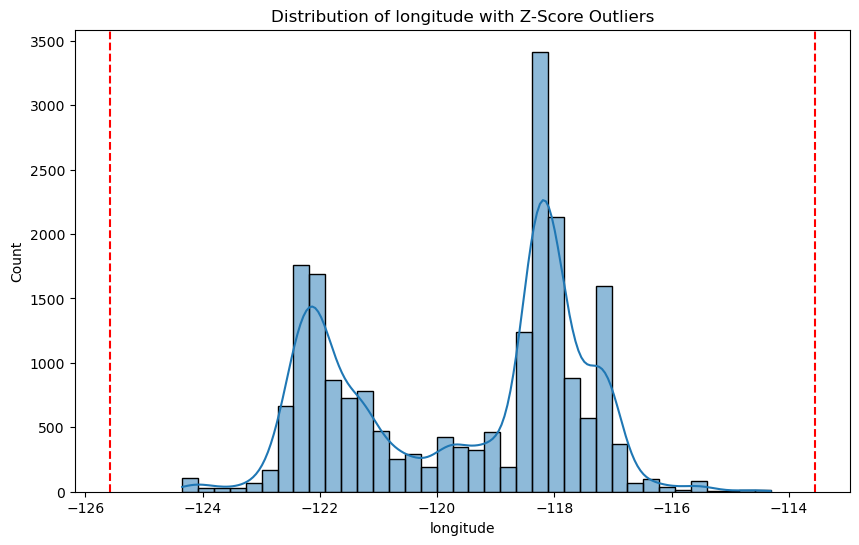

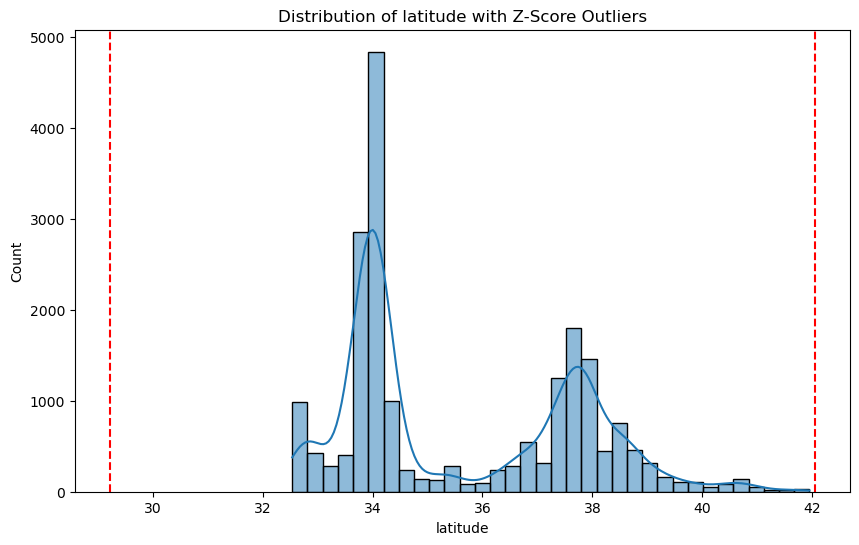

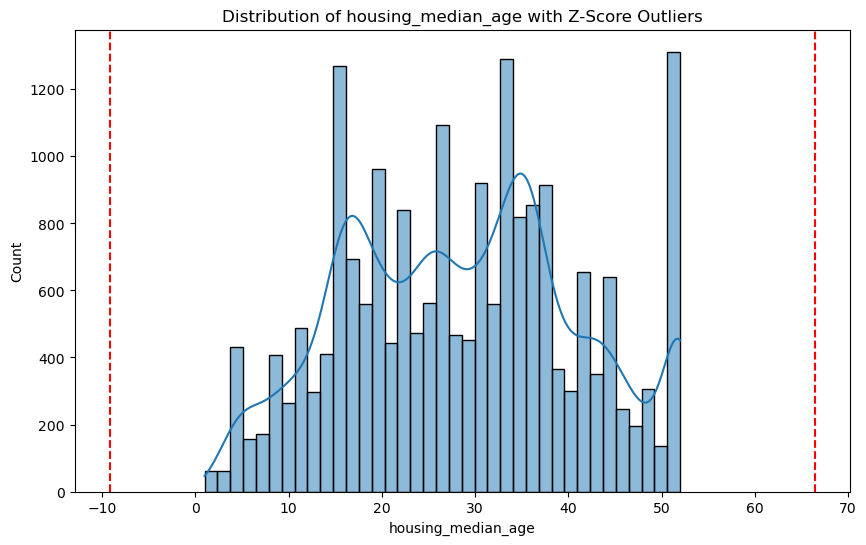

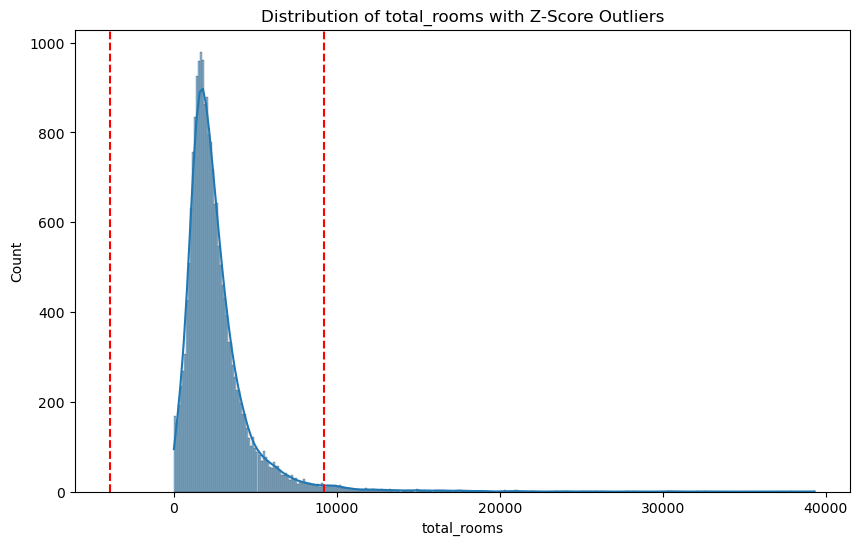

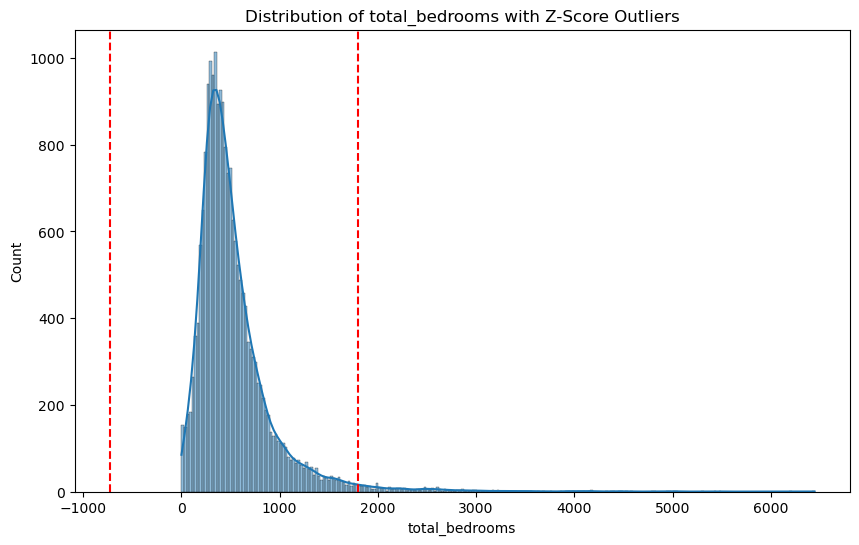

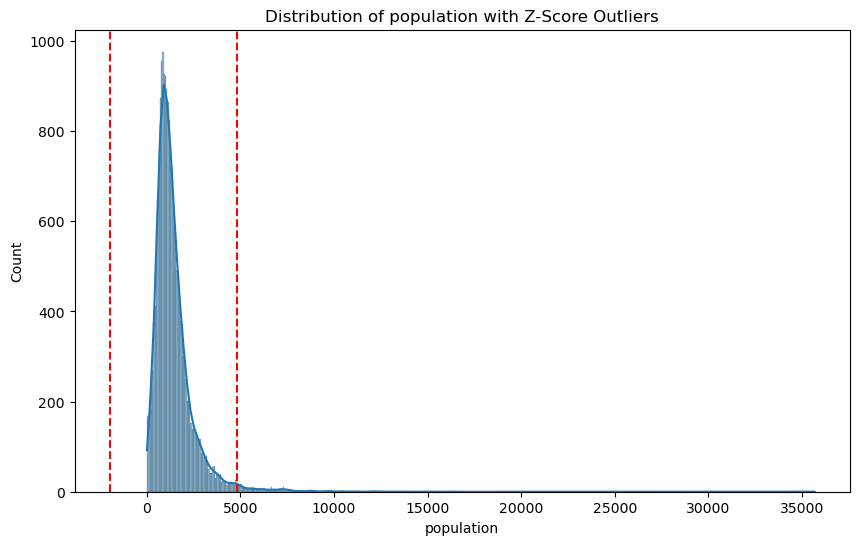

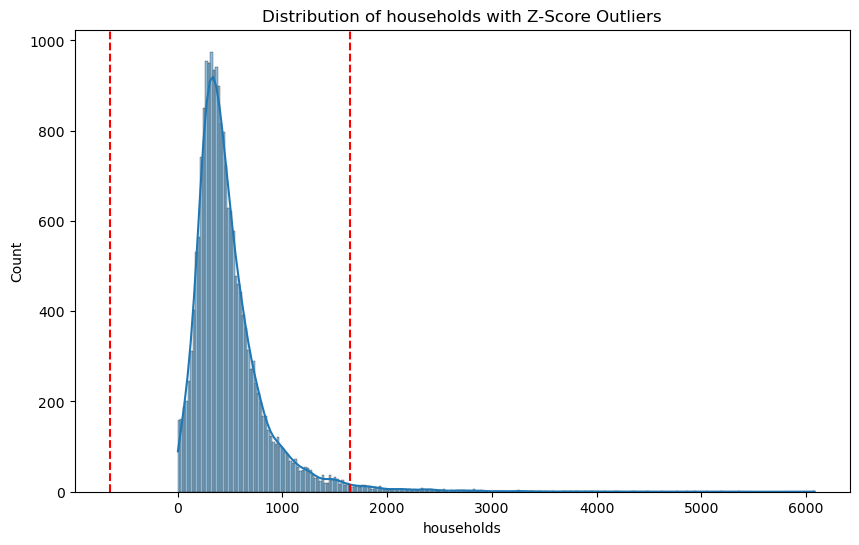

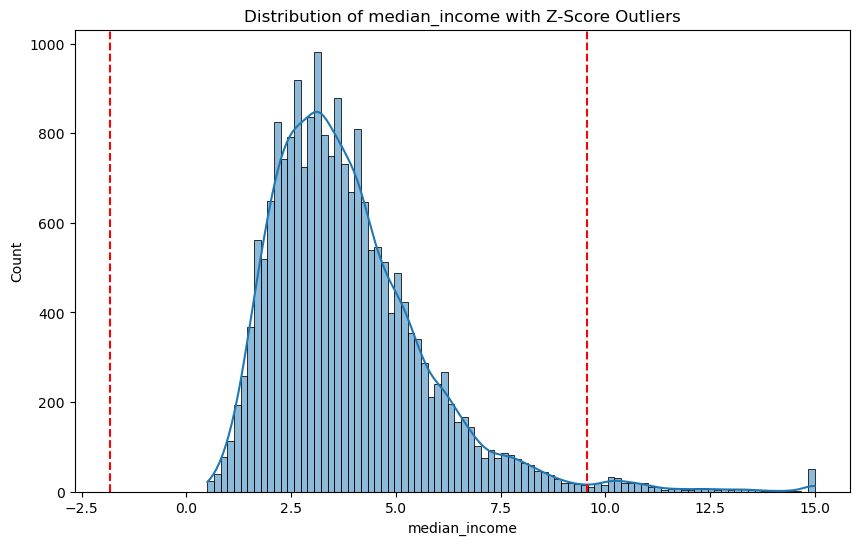

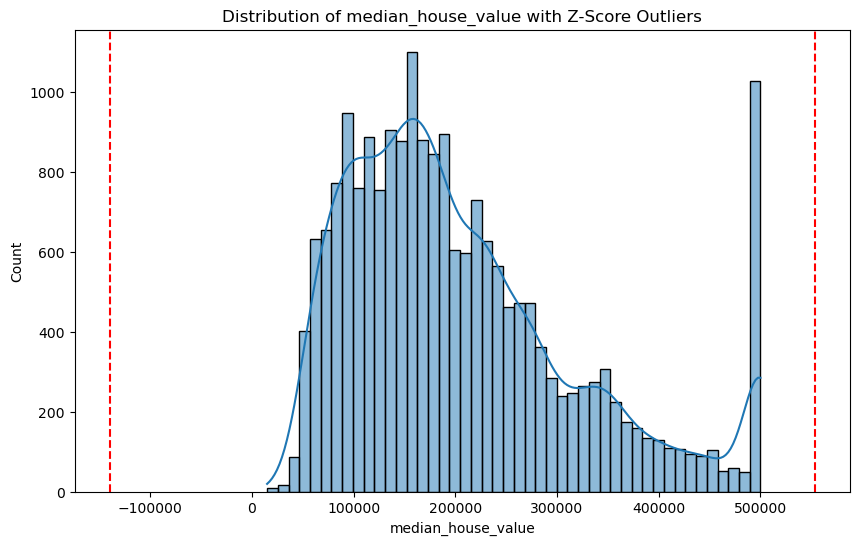

Outliers using Z-Score:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
283      -122.16     37.79                22.0      12842.0          2048.0   
570      -122.24     37.72                 5.0      18634.0          2885.0   
576      -122.06     37.77                12.0      14316.0          2045.0   
780      -122.10     37.63                18.0       9963.0          2031.0   
864      -122.01     37.57                14.0      16199.0          2993.0   
...          ...       ...                 ...          ...             ...   
20376    -118.86     34.16                16.0       1509.0           216.0   
20380    -118.83     34.14                16.0       1316.0           194.0   
20389    -118.90     34.19                26.0       1582.0           196.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20436    -118.69     34.21                10.0       3663.0           409.0   

       population  househo

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore



columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

outliers_z_score = pd.DataFrame()

for col in columns:
    # Z-Score Method:
    z_scores = zscore(new_df[col])
    abs_z_scores = abs(z_scores)
    outliers_z = new_df[(abs_z_scores > 3)]
    
    # Appending to the outliers dataframe
    outliers_z_score = pd.concat([outliers_z_score, outliers_z])

    # Plotting histogram for Z-score
    plt.figure(figsize=(10, 6))
    sns.histplot(new_df[col], kde=True)
    plt.axvline(x=new_df[col].mean() + 3*new_df[col].std(), color='r', linestyle='--')
    plt.axvline(x=new_df[col].mean() - 3*new_df[col].std(), color='r', linestyle='--')
    plt.title(f'Distribution of {col} with Z-Score Outliers')
    plt.show()

# Removing duplicate rows in case a row is an outlier for multiple columns
outliers_z_score = outliers_z_score.drop_duplicates()

print("Outliers using Z-Score:\n", outliers_z_score)

## INSIGHTS

#### AVERAGE HOUSEHOLDS PRESENT NEAR THE OCEAN PROXIMITY
- This piechart talks about average households that are present near the ocean proximity range 
- 22.9% households far from ocean and only 12.2% households are present near the island proximity

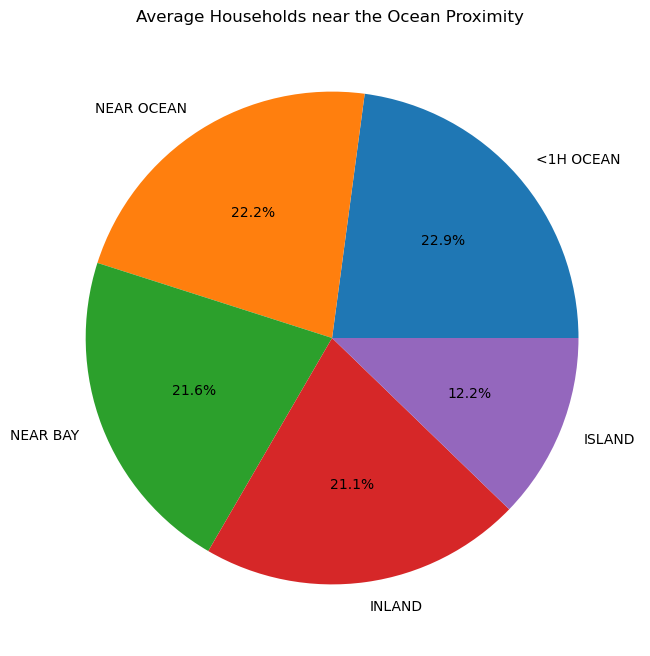

In [20]:
tmp = new_df.groupby(["ocean_proximity"])["households"].mean()
tmp = pd.DataFrame(tmp).reset_index()
tmp1 = tmp.sort_values("households", ascending = False)
plt.figure(figsize=(8, 8))  # reduce the figure size for pie chart
plt.pie(tmp1["households"], labels=tmp1["ocean_proximity"], autopct='%1.1f%%')
plt.title("Average Households near the Ocean Proximity ")
plt.show()

### AVERAGE POPULATION NEAR THE OCEAN PROXIMITY


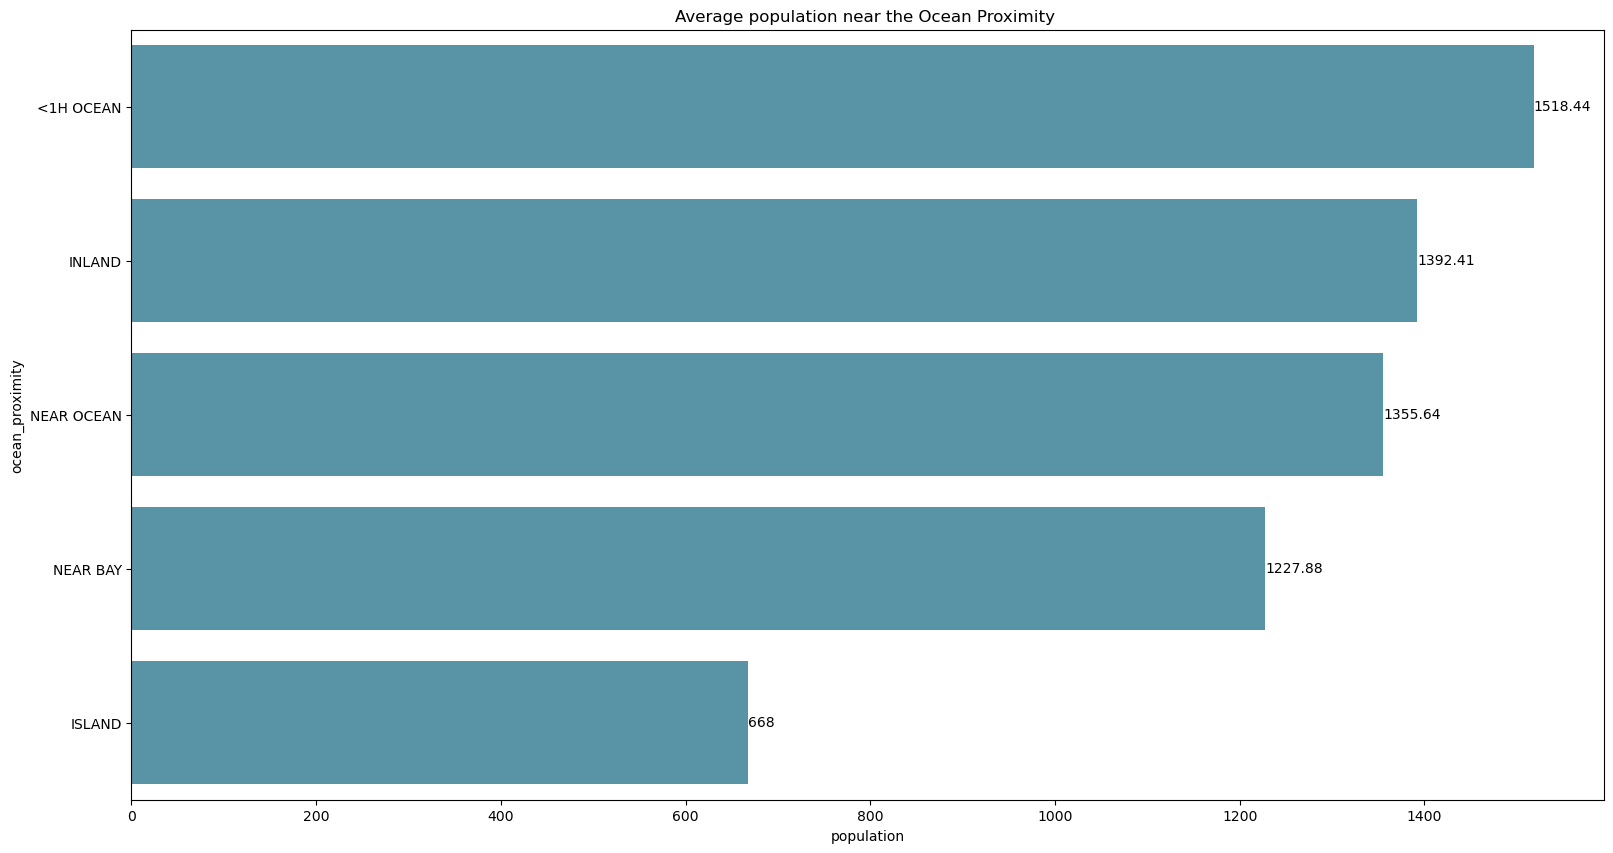

In [21]:
tmp = new_df.groupby(["ocean_proximity"])["population"].mean()
tmp = pd.DataFrame(tmp).reset_index()
tmp1 = tmp.sort_values("population", ascending = False)
plt.figure(figsize=(19,10))
ax = sns.barplot(x=tmp1["population"], y=tmp1["ocean_proximity"], color=(0.3, 0.6,
0.7, 0.8))
plt.title("Average population near the Ocean Proximity ")
for i in ax.containers:
    ax.bar_label(i,)
    11

### WHAT ARE THE AVERAGE MEDIAN HOUSING AGE OF THE HOUSES THAT ARE AROUND OCEAN  
- This graph talks about average median housing age of the houses near ocean proximity 
- We can clearly tell that houses near islands and bay area are much older compared to inland

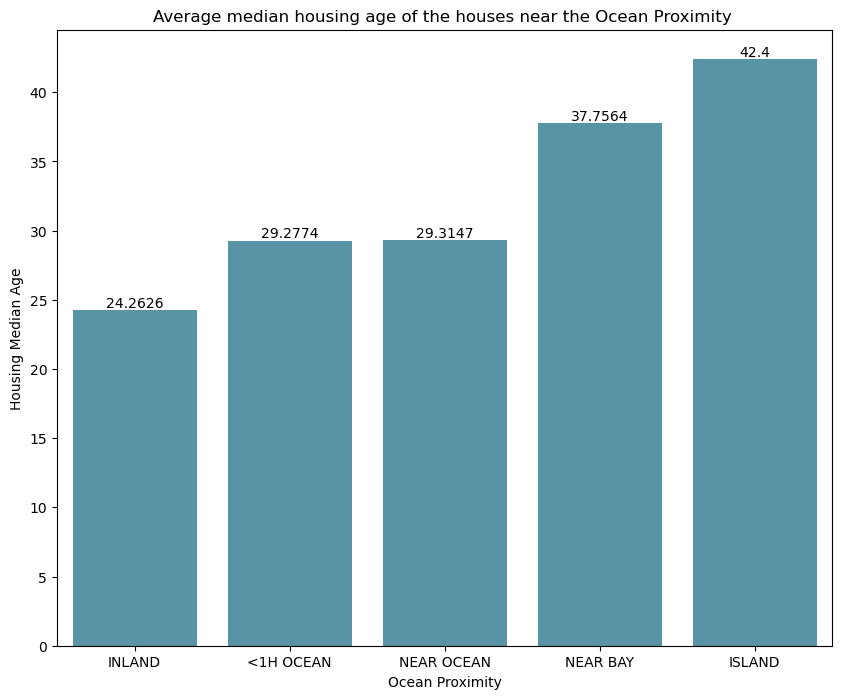

In [22]:
tmp = new_df.groupby(["ocean_proximity"])["housing_median_age"].mean()
tmp = pd.DataFrame(tmp).reset_index()
tmp = tmp.sort_values("housing_median_age")
plt.figure(figsize=(10, 8))  # adjust figure size
ax = sns.barplot(x=tmp["ocean_proximity"], y=tmp["housing_median_age"], color=(0.3, 0.6, 0.7, 0.8))
plt.title("Average median housing age of the houses near the Ocean Proximity ")
plt.xlabel("Ocean Proximity")
plt.ylabel("Housing Median Age")
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)  # add labels to bars
plt.show()


### POPULATION PERCENTAGE AROUND OCEAN PROXIMITY 
- This graph represents the population % around the ocean proximity 
- Its clear that 44.21% of the population stays <1H from Ocean 

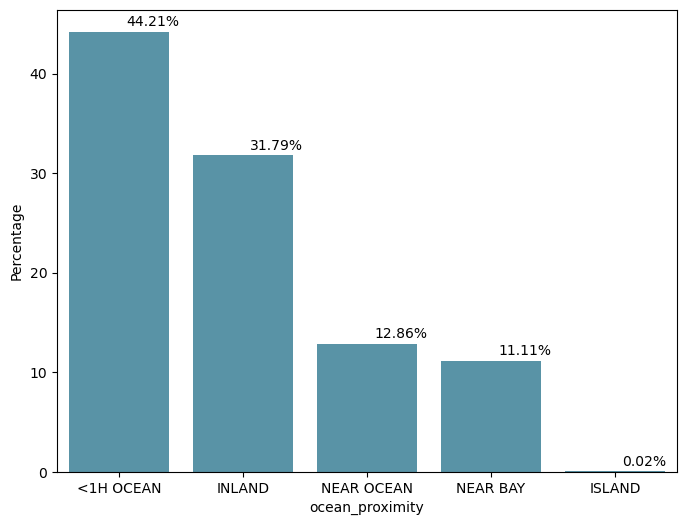

In [23]:
tmp = new_df.groupby(["ocean_proximity"])["households"].count()
tmp = tmp * 100 / tmp.sum()
tmp = pd.DataFrame(tmp).reset_index().rename(columns={"households": "Percentage"})
tmp = tmp.sort_values(by="Percentage", ascending=False)  # add this line
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tmp["ocean_proximity"], y=tmp["Percentage"], color = (0.3, 0.6,0.7, 0.8))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height() + "%", xy=(p.get_x() + p.get_width() /
2, p.get_height() + 1), 
xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### A SCATTERPLOT THAT SHOWS "MEDIAN HOUSE VALUE VS MEDIAN INCOME" 
- In this graph we can clearly understand that people who live INLAND have an income around 2k$- 6k$ and the median house value is ranging from 50,000 - 100000

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

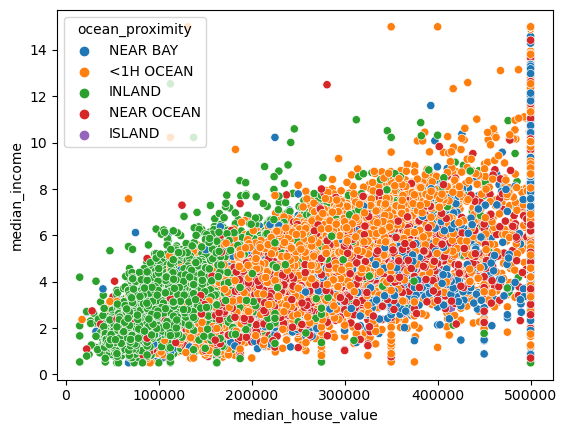

In [24]:
sns.scatterplot(x=new_df["median_house_value"], y=new_df["median_income"],hue=new_df["ocean_proximity"])

### REPRESENTING THE HOUSES THAT ARE 20-25 YEARS OLD ON A MAP

In [25]:
#filtering the data with 20-30 year range 
filtered_df = new_df[(new_df['latitude'].notnull()) & (new_df['longitude'].notnull()) & (new_df['housing_median_age'] >= 20) & (new_df['housing_median_age'] <=25)]
filtered_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY
74,-122.29,37.81,20.0,835.0,161.0,290.0,133.0,2.4830,137500.0,NEAR BAY
78,-122.29,37.81,23.0,1745.0,374.0,1054.0,325.0,0.8026,112500.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND
20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND


In [26]:
from folium.plugins import MarkerCluster
# create a new map object
m = fo.Map(location=[filtered_df['latitude'].mean(), filtered_df['longitude'].mean()], zoom_start=10)

# create a marker cluster layer
mc = MarkerCluster()

# add markers for each row in the dataframe to the marker cluster layer
for index, row in filtered_df.iterrows():
    lat = row['latitude']
    lon = row['longitude'] 
    house_age = row['housing_median_age']
    marker = fo.Marker(location=[lat, lon])
    marker.add_to(mc)

# add the marker cluster layer to the map
mc.add_to(m)

# set the zoom level of the map to a value that zooms in on the marker
min_lat, max_lat = filtered_df['latitude'].min(), filtered_df['latitude'].max()
min_lon, max_lon = filtered_df['longitude'].min(), filtered_df['longitude'].max()
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])


m
